In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

This notebook is a guide for the neural networks based models of the library of the project "". :)

Météo-France, CNRS, CNRM, Centre d’Etudes de la Neige \
Léo Catteau, Spring 2025

### Contents:
* [MLP](#first-subbullet)
* [GRIN](#second-bullet)

All neural networks based models are trained following the same procedure implemented by the Filler. 

### MLP training <a class="anchor" id="first-bullet"></a>

In [2]:
from data_provider.data_provider import DataProvider
from models.linear_MLP import linear_MLP
from trainer.Filler import Filler

from types import SimpleNamespace

/home/catteaul/Documents/code/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/catteaul/Documents/code/.venv/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/catteaul/Documents/code/.venv/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/catteaul/Documents/code/.v

In [13]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'SequenceMaskDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 100
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.01

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_provider.data.n_nodes)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-5
filler_kwargs.epochs = 10
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(linear_MLP, model_kwargs, filler_kwargs)

device:  cpu
device:  cpu


In [14]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/linear_MLP.pt')

start training
Epoch 1/10, Train Loss: 273.07380087, Test Loss: 307.07022905, time: 2.62s
Epoch 2/10, Train Loss: 142.65543539, Test Loss: 151.65386343, time: 4.12s
Epoch 3/10, Train Loss: 60.79915935, Test Loss: 55.20762690, time: 7.02s
Epoch 4/10, Train Loss: 19.05742793, Test Loss: 17.62816199, time: 9.95s
Epoch 5/10, Train Loss: 6.65581900, Test Loss: 10.50631234, time: 13.59s
Epoch 6/10, Train Loss: 4.81239538, Test Loss: 9.77774838, time: 17.85s
Epoch 7/10, Train Loss: 4.53351039, Test Loss: 9.63424495, time: 21.85s
Epoch 8/10, Train Loss: 4.34347534, Test Loss: 9.50992964, time: 24.43s
Epoch 9/10, Train Loss: 4.16282718, Test Loss: 9.37512869, time: 27.06s
Epoch 10/10, Train Loss: 3.99809578, Test Loss: 9.25630927, time: 30.31s


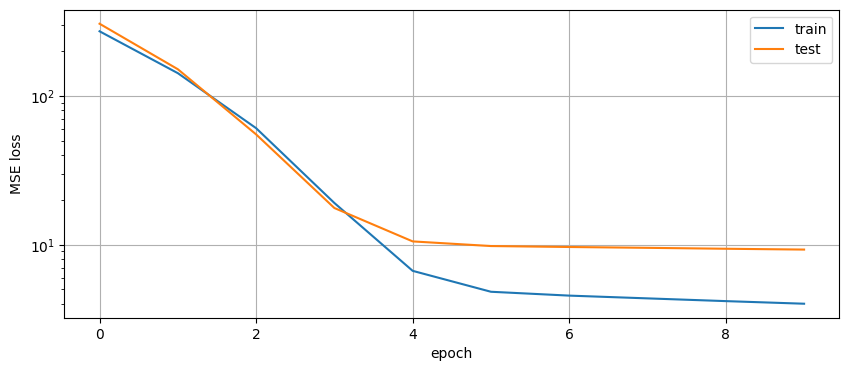

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### GRIN <a class="anchor" id="second-bullet"></a>

In [6]:
from data_provider.data_provider import DataProvider
from models.GRIN import GRINet
from trainer.Filler import Filler

from types import SimpleNamespace

In [7]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.scaler = None
data_kwargs.batch_size = 10
data_kwargs.window = 24*7*2
data_kwargs.horizon = 0
data_kwargs.mask_proba = 0.5
data_kwargs.mask_length = 24*7*1

data_provider = DataProvider(data_kwargs)
adjacency_matrix = torch.FloatTensor(data_provider.data.umap_adjacency(threshold=0.1, verbose=False)).to('cuda:0' if torch.cuda.is_available() else 'cpu')
#adjacency_matrix = torch.FloatTensor(data_provider.data.correlation_adjacency())
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(adj=adjacency_matrix, d_in=1)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-5
filler_kwargs.epochs = 10
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(GRINet, model_kwargs, filler_kwargs)

device:  cpu


/home/catteaul/Documents/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)
/home/catteaul/Documents/code/Meteo-France/notebook_guides/../data_provider/data_factory.py:149: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  reducer.fit_transform(predictors.fillna(method='ffill'))
/home/catteaul/Documents/code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/catteaul/Documents/code/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB versio

KeyboardInterrupt: 

In [ ]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)

start training


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
plt.ylim(0, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()